In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


# A foreword

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

**Content**
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

**Acknowledgements**
Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

# EDA - Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

**Read in the data**

In [3]:
dat = pd.read_csv('../input/ecommerce-data/data.csv')

In [4]:
print(dat.info(),'\n')
print(dat.describe(),'\n')
print(dat.sample(5),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None 

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.1300

**Measure non-null and unique entries per column**

In [5]:
colstats = {}
for col in dat.columns:
#     print("{} has  {}  null entries ({:.1f}%) and  {}  unique entries ({:.1f}%)".format(col,
#                 dat[col].isnull().sum(),dat[col].isnull().sum()*100/dat.shape[0],
#                 len(dat[col].unique()),len(dat[col].unique())*100/dat.shape[0]))
    colstats[col] = [dat[col].isnull().sum(),dat[col].isnull().sum()*100/dat.shape[0],
                len(dat[col].unique()),len(dat[col].unique())*100/dat.shape[0]] 
    
stats_col = pd.DataFrame(colstats.values(), index = colstats.keys(),  columns = ['#Null','%Null','#Unique','%Unique'])
pd.set_option('precision',2)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(stats_col)

              #Null  %Null  #Unique  %Unique
InvoiceNo         0    0.0    25900      4.8
StockCode         0    0.0     4070      0.8
Description    1454    0.3     4224      0.8
Quantity          0    0.0      722      0.1
InvoiceDate       0    0.0    23260      4.3
UnitPrice         0    0.0     1630      0.3
CustomerID   135080   24.9     4373      0.8
Country           0    0.0       38      0.0


Based on the table above, 25% of the data are missing CustomerID. All rows with missing Description have missing CustomerID as well.

In [6]:
temp = dat[dat.Description.isnull()].copy()
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 622 to 538554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1454 non-null   object 
 1   StockCode    1454 non-null   object 
 2   Description  0 non-null      object 
 3   Quantity     1454 non-null   int64  
 4   InvoiceDate  1454 non-null   object 
 5   UnitPrice    1454 non-null   float64
 6   CustomerID   0 non-null      float64
 7   Country      1454 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 102.2+ KB
None


**Orders by country**

,sum
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480


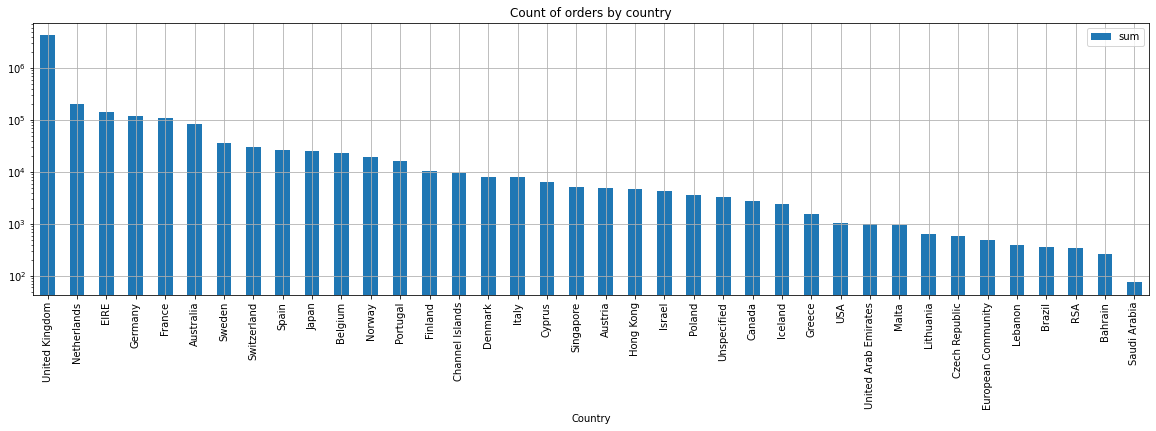

In [7]:
# orders by country
fig,ax = plt.subplots(1,1,figsize=(20,5))
stats_country = dat.groupby(['Country']).Quantity.agg([np.sum])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax).set_title('Count of orders by country')
plt.yscale("log")
plt.grid()

stats_country.sort_values(by='sum',ascending=False).head()

,sum,mean
Country,,
Netherlands,284661.5,120.1
Australia,137077.3,108.9
Japan,35340.6,98.7
Sweden,36595.9,79.2
Denmark,18768.1,48.2


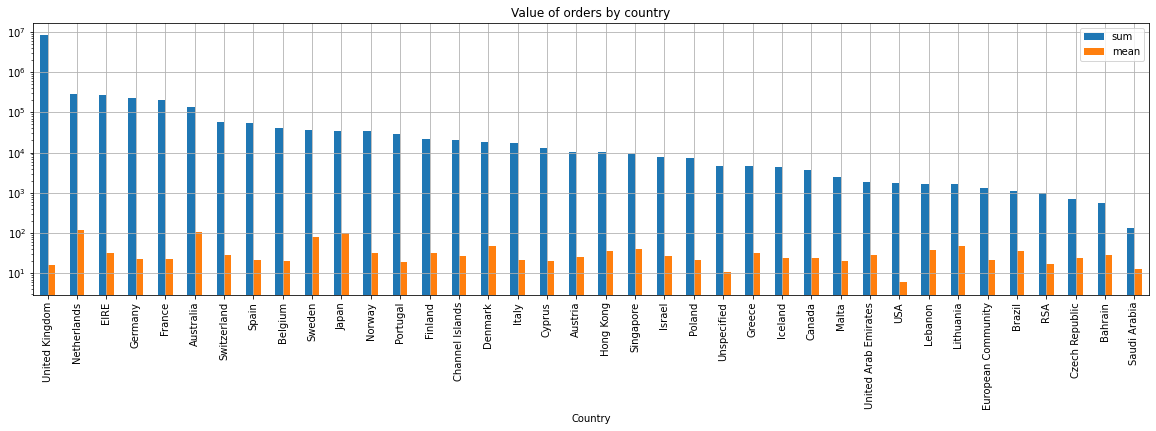

In [8]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
temp = dat.copy()
temp['Value'] = temp['Quantity']*temp['UnitPrice']
stats_country = temp.groupby(['Country']).Value.agg([np.sum, np.mean])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax).set_title('Value of orders by country')
plt.yscale("log")
plt.grid()

stats_country.sort_values(by='mean',ascending=False).head()

In [9]:
# Just a check to make sure that what the above cell is doing is right ...
# xx = temp[temp.Country.str.contains('United Kingdom')].copy()
# print(xx.Quantity.sum(), xx.Value.sum(), xx.Value.mean())

**Customer ID to country**

In [10]:
stats_cust = dat.groupby(['CustomerID'])
for key,value in stats_cust:
    if len(value.Country.unique()) > 1:
        print(key, value.Country.unique())

12370.0 ['Cyprus' 'Austria']
12394.0 ['Belgium' 'Denmark']
12417.0 ['Belgium' 'Spain']
12422.0 ['Australia' 'Switzerland']
12429.0 ['Denmark' 'Austria']
12431.0 ['Australia' 'Belgium']
12455.0 ['Cyprus' 'Spain']
12457.0 ['Switzerland' 'Cyprus']


The list of customers above seems to have placed orders from multiple countries. For others, there is a 1-to-1 mapping between customer and country.

**Stock code to description**

In [11]:
stats_stock = dat.groupby(['StockCode'])
counter = 0
for key, value in stats_stock:
    if counter < 2:
        print(key)
        print(value.Description)
        counter += 1

10002
31        INFLATABLE POLITICAL GLOBE 
142       INFLATABLE POLITICAL GLOBE 
4272      INFLATABLE POLITICAL GLOBE 
5466      INFLATABLE POLITICAL GLOBE 
5546      INFLATABLE POLITICAL GLOBE 
                     ...             
143465    INFLATABLE POLITICAL GLOBE 
143930    INFLATABLE POLITICAL GLOBE 
158070    INFLATABLE POLITICAL GLOBE 
160128    INFLATABLE POLITICAL GLOBE 
171573                            NaN
Name: Description, Length: 73, dtype: object
10080
103332    GROOVY CACTUS INFLATABLE
234546    GROOVY CACTUS INFLATABLE
245552    GROOVY CACTUS INFLATABLE
249766    GROOVY CACTUS INFLATABLE
279310                         NaN
279438    GROOVY CACTUS INFLATABLE
285791    GROOVY CACTUS INFLATABLE
286814    GROOVY CACTUS INFLATABLE
287990    GROOVY CACTUS INFLATABLE
309221    GROOVY CACTUS INFLATABLE
327182    GROOVY CACTUS INFLATABLE
330669    GROOVY CACTUS INFLATABLE
346729    GROOVY CACTUS INFLATABLE
361806    GROOVY CACTUS INFLATABLE
388869    GROOVY CACTUS INFLATABLE


The above analysis suggests that stockcode is uniquely mapped to the Description. If one were to use Description in the analysis and modeling, we can use StockCode to imput missing values. Alternately, in this case, I plan to drop Description in favor of using StockCode in any subsequent modeling I intend to do.

**Invoice number to date/time**

In [12]:
temp = dat.groupby(['InvoiceNo'])
for key,value in temp:
    if len(value.InvoiceDate.unique()) > 1:
        print(key, value.InvoiceDate.unique())

536591 ['12/1/2010 16:57' '12/1/2010 16:58']
540185 ['1/5/2011 13:40' '1/5/2011 13:41']
541596 ['1/19/2011 16:18' '1/19/2011 16:19']
541631 ['1/20/2011 10:47' '1/20/2011 10:48']
541809 ['1/21/2011 14:58' '1/21/2011 14:59']
541816 ['1/21/2011 15:56' '1/21/2011 15:57']
541849 ['1/23/2011 13:33' '1/23/2011 13:34']
542217 ['1/26/2011 12:35' '1/26/2011 12:36']
542806 ['2/1/2011 11:19' '2/1/2011 11:20']
543171 ['2/4/2011 9:10' '2/4/2011 9:11']
543179 ['2/4/2011 10:31' '2/4/2011 10:32']
543182 ['2/4/2011 10:39' '2/4/2011 10:40']
543777 ['2/11/2011 16:19' '2/11/2011 16:20']
544186 ['2/16/2011 15:55' '2/16/2011 15:56']
544667 ['2/22/2011 15:09' '2/22/2011 15:10']
544926 ['2/24/2011 17:50' '2/24/2011 17:51']
545460 ['3/2/2011 17:32' '3/2/2011 17:33']
545713 ['3/7/2011 10:11' '3/7/2011 10:12']
546388 ['3/11/2011 13:42' '3/11/2011 13:43']
546986 ['3/18/2011 12:55' '3/18/2011 12:56']
547690 ['3/24/2011 14:55' '3/24/2011 14:56']
548203 ['3/29/2011 16:40' '3/29/2011 16:41']
549245 ['4/7/2011 11:59' '

Based on the analysis above, invoice number is uniquely related to the invoice date (within a sec or so).

**Preprocessing - imputing, removing nulls and duplicates**

In [13]:
df = dat.copy()

In [14]:
# Imput on Description based on StockCode - although I don't intend to use Description in any analysis
# xx = lambda x : x.mode().iloc[0]
# xxx = df.groupby(['StockCode']).apply(xx)
temp1 = df.groupby('StockCode').Description.agg(pd.Series.mode).to_frame()
df["Description"].fillna(lambda x: temp1.loc[x]["Description"],inplace=True)

In [15]:
# temp = df.sample(5)
# print(temp.Description)
# print(dat.loc[temp.index]["Description"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
lofInvoiceNo_NoCustID = list(set(df[df.CustomerID.isnull()].InvoiceNo))
print(df.CustomerID.isnull().sum(),len(lofInvoiceNo_NoCustID))

lofInvoiceNo_CustID = list(set(df[df.CustomerID.notnull()].InvoiceNo))
print(df.CustomerID.notnull().sum(),len(lofInvoiceNo_CustID))

print('Common InvoiceNo between rows that have CustomerId and those that do not', 
      list(set(lofInvoiceNo_NoCustID) & set(lofInvoiceNo_CustID)))       

135080 3710
406829 22190
Common InvoiceNo between rows that have CustomerId and those that do not []


Since there is no obvious way to imput missing CustomerID from the data, best option available seems to be to drop these rows.

In [18]:
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [20]:
locancelledInvoice = df[df.Quantity < 0].InvoiceNo.unique()
locompletedInvoice = df[df.Quantity >= 0].InvoiceNo.unique()
# all cancelled orders have negative quantities ad InvoiceNo contains a C
if len(set(["C" in l for l in locancelledInvoice])) == 1:
    print("all cancelled orders have negative quantities and corresponding InvoiceNo contains a C")
    
    
if len(set(["C" in l for l in locompletedInvoice])) == 1:
    print("all successful orders have positive quantities and InvoiceNo is all digits")
    
n_cancelInvoice = len(locancelledInvoice)
n_completeInvoice = len(locompletedInvoice)
print("{} orders were canceled out of {} total orders ({:.1f}%)".format(n_cancelInvoice,
                                                                    n_completeInvoice+n_cancelInvoice, 
                                                                    n_cancelInvoice*100/(n_completeInvoice+n_cancelInvoice)))

df["OrderStatus_"]= "Completed"
df.loc[df[df.Quantity < 0].index,"OrderStatus_"] = "Cancellation"


all cancelled orders have negative quantities and corresponding InvoiceNo contains a C
all successful orders have positive quantities and InvoiceNo is all digits
3654 orders were canceled out of 22190 total orders (16.5%)


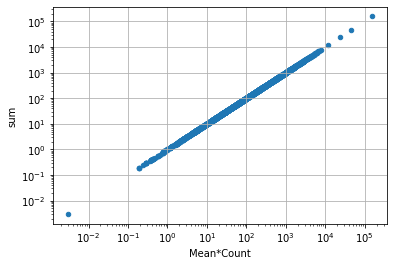

In [21]:
# checking to see if unit price per product is invariant over time
temp = df.groupby(["StockCode"]).UnitPrice.agg(['count','mean','sum'])
temp['Mean*Count'] = temp['mean']*temp['count']
temp.plot(kind='scatter',x='Mean*Count',y='sum')
plt.yscale('log')
plt.xscale('log')
plt.grid()

In [22]:
df['Value_'] = df['Quantity']*df['UnitPrice']
df.groupby(["StockCode"])['Value_'].agg([np.sum]).tail(8).index
# Mark rows that have transactions "'BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST'" as "Exclude"
df["Exclude_"] = "False"
df.loc[df[df.StockCode.isin(df.groupby(["StockCode"])['Value_'].agg([np.sum]).tail(8).index)].index,"Exclude_"] = "True"

In [23]:
# Convert returned negative quantity to postivie for analysis
df['PQuantity_'] = df['Quantity']
df.loc[df[df.Quantity < 0].index, 'PQuantity_'] = df.Quantity*-1

In [24]:
df['Invoicedate_'] = pd.to_datetime(df['InvoiceDate'])

In [25]:
df['OrderInvoiceNo_'] = ''
# df['CancelledAfterDays_'] = ''
temp = df[df['OrderStatus_'].str.contains("Cancellation")].copy()
ttemp = df[~df['OrderStatus_'].str.contains("Cancellation")].copy()

import time
st = time.time()
count = 0
for idx,row in temp.sort_values(by='PQuantity_',ascending=False).iterrows():  
    bl1 = (ttemp.CustomerID == row.CustomerID) & (ttemp.StockCode == row.StockCode) 
    bl2 = (ttemp.PQuantity_ >= row.PQuantity_) & (ttemp.Invoicedate_ < row.Invoicedate_)
    stemp = ttemp[bl1 & bl2].copy()
    if stemp.shape[0] == 1:
        if stemp.iloc[0]['PQuantity_'] == row.PQuantity_:
            temp.loc[idx,'OrderInvoiceNo_'] = stemp.iloc[0].InvoiceNo
        else:
            temp.loc[idx,'OrderInvoiceNo_'] = stemp.iloc[0].InvoiceNo
            temp.loc[idx, 'OrderStatus_'] = 'PartialReturn'
    else:            
        temp.loc[idx, 'OrderStatus_'] = 'NoCorrOrder'  
    count += 1
    if count%500 == 0:
        print('Completed ... {:.0f}%'.format(count/temp.shape[0]*100))
en = time.time()
print("Elapsed time (s) = ",en-st)
# takes about 10 min

Completed ... 6%
Completed ... 11%
Completed ... 17%
Completed ... 23%
Completed ... 28%
Completed ... 34%
Completed ... 39%
Completed ... 45%
Completed ... 51%
Completed ... 56%
Completed ... 62%
Completed ... 68%
Completed ... 73%
Completed ... 79%
Completed ... 85%
Completed ... 90%
Completed ... 96%
Elapsed time (s) =  240.6102945804596


In [26]:
df.loc[temp.index] = temp

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        401604 non-null  object        
 1   StockCode        401604 non-null  object        
 2   Description      401604 non-null  object        
 3   Quantity         401604 non-null  int64         
 4   InvoiceDate      401604 non-null  object        
 5   UnitPrice        401604 non-null  float64       
 6   CustomerID       401604 non-null  float64       
 7   Country          401604 non-null  object        
 8   OrderStatus_     401604 non-null  object        
 9   Value_           401604 non-null  float64       
 10  Exclude_         401604 non-null  object        
 11  PQuantity_       401604 non-null  int64         
 12  Invoicedate_     401604 non-null  datetime64[ns]
 13  OrderInvoiceNo_  401604 non-null  object        
dtypes: datetime64[ns](1)

In [28]:
df['Month_'] = pd.DatetimeIndex(df.Invoicedate_).month
df['Year_']= pd.DatetimeIndex(df.Invoicedate_).year
df['Day_']= pd.DatetimeIndex(df.Invoicedate_).day
df['Time_']=pd.DatetimeIndex(df.Invoicedate_).hour
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderStatus_,Value_,Exclude_,PQuantity_,Invoicedate_,OrderInvoiceNo_,Month_,Year_,Day_,Time_
207996,555076,23298,SPOTTY BUNTING,3,5/31/2011 12:11,5.0,13900.0,United Kingdom,Completed,14.9,False,3,2011-05-31 12:11:00,,5,2011,31,12
96466,544569,22961,JAM MAKING SET PRINTED,2,2/21/2011 12:58,1.4,16980.0,United Kingdom,Completed,2.9,False,2,2011-02-21 12:58:00,,2,2011,21,12
252645,559133,23121,PACK OF 6 COCKTAIL PARASOL STRAWS,7,7/6/2011 13:13,0.4,17861.0,United Kingdom,Completed,2.9,False,7,2011-07-06 13:13:00,,7,2011,6,13
444909,574741,21871,SAVE THE PLANET MUG,2,11/6/2011 16:13,1.6,15993.0,United Kingdom,Completed,3.3,False,2,2011-11-06 16:13:00,,11,2011,6,16
387455,570289,23298,SPOTTY BUNTING,2,10/10/2011 11:50,5.0,17377.0,United Kingdom,Completed,9.9,False,2,2011-10-10 11:50:00,,10,2011,10,11
242286,558330,21524,DOORMAT SPOTTY HOME SWEET HOME,1,6/28/2011 12:16,8.0,12748.0,United Kingdom,Completed,8.0,False,1,2011-06-28 12:16:00,,6,2011,28,12
312614,564359,22551,PLASTERS IN TIN SPACEBOY,3,8/24/2011 16:02,1.6,14056.0,United Kingdom,Completed,4.9,False,3,2011-08-24 16:02:00,,8,2011,24,16
307411,563917,23245,SET OF 3 REGENCY CAKE TINS,4,8/21/2011 13:46,5.0,14572.0,United Kingdom,Completed,19.8,False,4,2011-08-21 13:46:00,,8,2011,21,13
149119,549277,22916,HERB MARKER THYME,1,4/7/2011 13:11,0.7,16469.0,United Kingdom,Completed,0.7,False,1,2011-04-07 13:11:00,,4,2011,7,13
448283,C575042,22327,ROUND SNACK BOXES SET OF 4 SKULLS,-1,11/8/2011 12:05,3.0,16764.0,United Kingdom,PartialReturn,-3.0,False,1,2011-11-08 12:05:00,570088,11,2011,8,12


# Analysis of the prepared data

**Order Analysis**

In [29]:
import warnings
warnings.filterwarnings('ignore')